# 🎯 SETAR Model - Part 2: Loss Function Contour Analysis

## 📋 Model Definition

We use the following **SETAR(1)** model definition:

$$
X_t = \begin{cases}
a_0^{(1)} + a_1^{(1)} X_{t-1} + \varepsilon_t^{(1)}, & \text{if } X_{t-1} \leq 0 \\[4pt]
a_0^{(2)} + a_1^{(2)} X_{t-1} + \varepsilon_t^{(2)}, & \text{if } X_{t-1} > 0
\end{cases}
$$

**Initial Parameter Settings:**
- $a_0^{(1)} = 1.0$, $a_1^{(1)} = 0.6$
- $a_0^{(2)} = -1.0$, $a_1^{(2)} = 0.4$
- $\varepsilon_t^{(i)} \sim \mathcal{N}(0, 1)$

## 🎯 Part 2 Objectives

1. Select two parameters as variables: $p_1 = a_1^{(1)}$ and $p_2 = a_1^{(2)}$
2. Fix other parameters and calculate the prediction error loss function $Q_N(p_1, p_2)$ on a 2D grid
3. Plot contour maps for different sample lengths
4. Analyze the impact of sample size on the shape of the loss function

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducible results
np.random.seed(42)

# Set matplotlib font settings
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("✅ All necessary libraries imported successfully!")

✅ All necessary libraries imported successfully!


## 🔧 Step 1: SETAR Model Simulation Function

In [2]:
def simulate_setar(n, a0_1, a1_1, a0_2, a1_2, threshold=0.0, x0=0.0):
    """
    Simulate SETAR(1) time series
    
    Parameters:
    - n: Length of time series
    - a0_1, a1_1: Parameters for first regime (X_{t-1} <= threshold)
    - a0_2, a1_2: Parameters for second regime (X_{t-1} > threshold)  
    - threshold: Threshold value, default is 0
    - x0: Initial value, default is 0
    
    Returns:
    - X: Time series array of length n
    """
    X = np.zeros(n)
    X[0] = x0
    
    # Generate error terms
    errors = np.random.normal(0, 1, n)
    
    for t in range(1, n):
        if X[t-1] <= threshold:
            # Regime 1: X_{t-1} <= 0
            X[t] = a0_1 + a1_1 * X[t-1] + errors[t]
        else:
            # Regime 2: X_{t-1} > 0
            X[t] = a0_2 + a1_2 * X[t-1] + errors[t]
    
    return X

# Test the function
print("📊 SETAR simulation function defined successfully!")
print("Test generating 10 data points:")
test_series = simulate_setar(10, 1.0, 0.6, -1.0, 0.4)
print(f"First 10 values: {test_series}")
print(f"Mean: {np.mean(test_series):.3f}, Std: {np.std(test_series):.3f}")

📊 SETAR simulation function defined successfully!
Test generating 10 data points:
First 10 values: [ 0.          0.8617357  -0.00761718  2.51845955 -0.22676956  0.62980131
  0.83113334  0.09988806 -1.42951916  0.68484855]
Mean: 0.396, Std: 0.958


## 📊 Step 2: Prediction Error Loss Function

In [3]:
def loss_function(params, X, threshold=0.0):
    """
    Calculate SETAR model prediction error loss function Q_N(θ)
    
    Loss function is defined as: Q_N(θ) = Σ(X_t - X̂_t(θ))²
    
    Parameters:
    - params: [a0_1, a1_1, a0_2, a1_2] model parameters
    - X: Observed time series
    - threshold: Threshold value, default is 0
    
    Returns:
    - loss: Sum of squared prediction errors
    """
    a0_1, a1_1, a0_2, a1_2 = params
    n = len(X)
    error_sum = 0.0
    
    for t in range(1, n):
        # Select model based on threshold condition
        if X[t-1] <= threshold:
            # Regime 1 prediction
            pred = a0_1 + a1_1 * X[t-1]
        else:
            # Regime 2 prediction
            pred = a0_2 + a1_2 * X[t-1]
        
        # Calculate squared prediction error
        error_sum += (X[t] - pred)**2
    
    return error_sum

# Test the loss function
test_params = [1.0, 0.6, -1.0, 0.4]  # True parameters
test_loss = loss_function(test_params, test_series)
print(f"✅ Loss function defined successfully!")
print(f"Loss value for test series with true parameters: {test_loss:.4f}")

# Test with incorrect parameters
wrong_params = [1.5, 0.3, -0.5, 0.8]
wrong_loss = loss_function(wrong_params, test_series)
print(f"Loss value for test series with wrong parameters: {wrong_loss:.4f}")
print(f"Loss difference: {wrong_loss - test_loss:.4f}")

✅ Loss function defined successfully!
Loss value for test series with true parameters: 6.4655
Loss value for test series with wrong parameters: 7.0213
Loss difference: 0.5558


## 📈 Step 3: Generate SETAR Time Series Data

📊 True model parameters:
  a0_1 = 1.0
  a1_1 = 0.6
  a0_2 = -1.0
  a1_2 = 0.4

✅ Generated SETAR time series of length 3000
Series statistics:
  Mean: -0.0473
  Std: 1.1776
  Min: -3.8634
  Max: 3.9235

Regime distribution:
  Regime 1 (X_{t-1} ≤ 0): 1558 times (52.0%)
  Regime 2 (X_{t-1} > 0): 1441 times (48.0%)


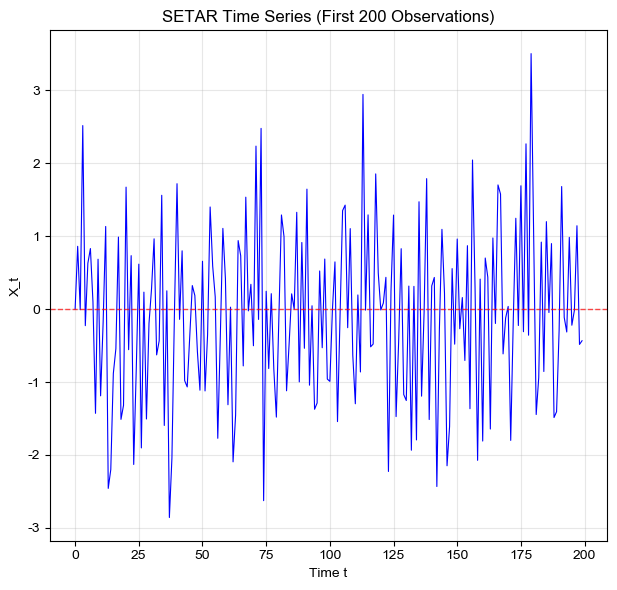

In [4]:
# Set true parameters (initial parameters)
true_params = {
    'a0_1': 1.0,   # Regime 1 intercept
    'a1_1': 0.6,   # Regime 1 autoregressive coefficient  
    'a0_2': -1.0,  # Regime 2 intercept
    'a1_2': 0.4    # Regime 2 autoregressive coefficient
}

print("📊 True model parameters:")
for param, value in true_params.items():
    print(f"  {param} = {value}")

# Generate 3000-step SETAR time series
N = 3000
np.random.seed(42)  # Ensure reproducible results
X_full = simulate_setar(N, true_params['a0_1'], true_params['a1_1'], 
                       true_params['a0_2'], true_params['a1_2'])

print(f"\n✅ Generated SETAR time series of length {N}")
print(f"Series statistics:")
print(f"  Mean: {np.mean(X_full):.4f}")
print(f"  Std: {np.std(X_full):.4f}")
print(f"  Min: {np.min(X_full):.4f}")
print(f"  Max: {np.max(X_full):.4f}")

# Calculate observations in different regimes
state1_count = np.sum(X_full[:-1] <= 0)  # Number of X_{t-1} <= 0
state2_count = np.sum(X_full[:-1] > 0)   # Number of X_{t-1} > 0
print(f"\nRegime distribution:")
print(f"  Regime 1 (X_{{t-1}} ≤ 0): {state1_count} times ({state1_count/(N-1)*100:.1f}%)")
print(f"  Regime 2 (X_{{t-1}} > 0): {state2_count} times ({state2_count/(N-1)*100:.1f}%)")

# Visualize the first 200 points of time series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(X_full[:200], 'b-', linewidth=0.8)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7, linewidth=1)
plt.title('SETAR Time Series (First 200 Observations)', fontsize=12)
plt.xlabel('Time t')
plt.ylabel('X_t')
plt.grid(True, alpha=0.3)

# # Plot histogram
# plt.subplot(1, 2, 2)
# plt.hist(X_full, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
# plt.axvline(x=0, color='r', linestyle='--', alpha=0.7, linewidth=2, label='Threshold=0')
# plt.title('SETAR Series Distribution', fontsize=12)
# plt.xlabel('X_t')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔍 Step 4: Parameter Grid Setup and Loss Function Calculation

In [5]:
def compute_loss_grid(X_subset, p1_range, p2_range, fixed_a0_1=1.0, fixed_a0_2=-1.0):
    """
    Compute loss function on parameter grid
    
    Parameters:
    - X_subset: Time series subset
    - p1_range: Range of values for p1 = a1^(1)
    - p2_range: Range of values for p2 = a1^(2)  
    - fixed_a0_1, fixed_a0_2: Fixed intercept parameters
    
    Returns:
    - Q_grid: Grid of loss function values
    """
    n_p1, n_p2 = len(p1_range), len(p2_range)
    Q_grid = np.zeros((n_p1, n_p2))
    
    for i, p1 in enumerate(p1_range):
        for j, p2 in enumerate(p2_range):
            params = [fixed_a0_1, p1, fixed_a0_2, p2]
            Q_grid[i, j] = loss_function(params, X_subset)
    
    return Q_grid

# Set up parameter grid
# Choose p1 = a1^(1) and p2 = a1^(2) as variable parameters
p1_vals = np.linspace(0.0, 1.2, 60)  # a1^(1) range: 0.0 to 1.2
p2_vals = np.linspace(0.0, 1.0, 50)  # a1^(2) range: 0.0 to 1.0

print("🎯 Parameter grid setup:")
print(f"p1 = a1^(1) range: [{p1_vals.min():.1f}, {p1_vals.max():.1f}], steps: {len(p1_vals)}")
print(f"p2 = a1^(2) range: [{p2_vals.min():.1f}, {p2_vals.max():.1f}], steps: {len(p2_vals)}")
print(f"True parameter values: p1 = {true_params['a1_1']}, p2 = {true_params['a1_2']}")

# Define different sample subsets (according to problem requirements)
sample_configs = {
    'Full (1:3000)': X_full[:3000],
    'Medium (1:300)': X_full[:300], 
    'Small (1:30)': X_full[:30],
    'Mid-range (1001:1300)': X_full[1000:1300],
    'Tiny (1001:1030)': X_full[1000:1030]
}

print(f"\n📊 Sample subset configuration:")
for name, subset in sample_configs.items():
    print(f"  {name}: Length = {len(subset)}")
    
print(f"\n⏳ Preparing to calculate loss function grid... (this may take some time)")

🎯 Parameter grid setup:
p1 = a1^(1) range: [0.0, 1.2], steps: 60
p2 = a1^(2) range: [0.0, 1.0], steps: 50
True parameter values: p1 = 0.6, p2 = 0.4

📊 Sample subset configuration:
  Full (1:3000): Length = 3000
  Medium (1:300): Length = 300
  Small (1:30): Length = 30
  Mid-range (1001:1300): Length = 300
  Tiny (1001:1030): Length = 30

⏳ Preparing to calculate loss function grid... (this may take some time)


## 📈 Step 5: Contour Plot Drawing and Comparative Analysis

Computing loss function grid for Full (1:3000) sample...
  Computation completed in 2.73 seconds
Computing loss function grid for Medium (1:300) sample...
  Computation completed in 0.27 seconds
Computing loss function grid for Small (1:30) sample...
  Computation completed in 0.03 seconds
Computing loss function grid for Mid-range (1001:1300) sample...
  Computation completed in 0.27 seconds
Computing loss function grid for Tiny (1001:1030) sample...
  Computation completed in 0.03 seconds


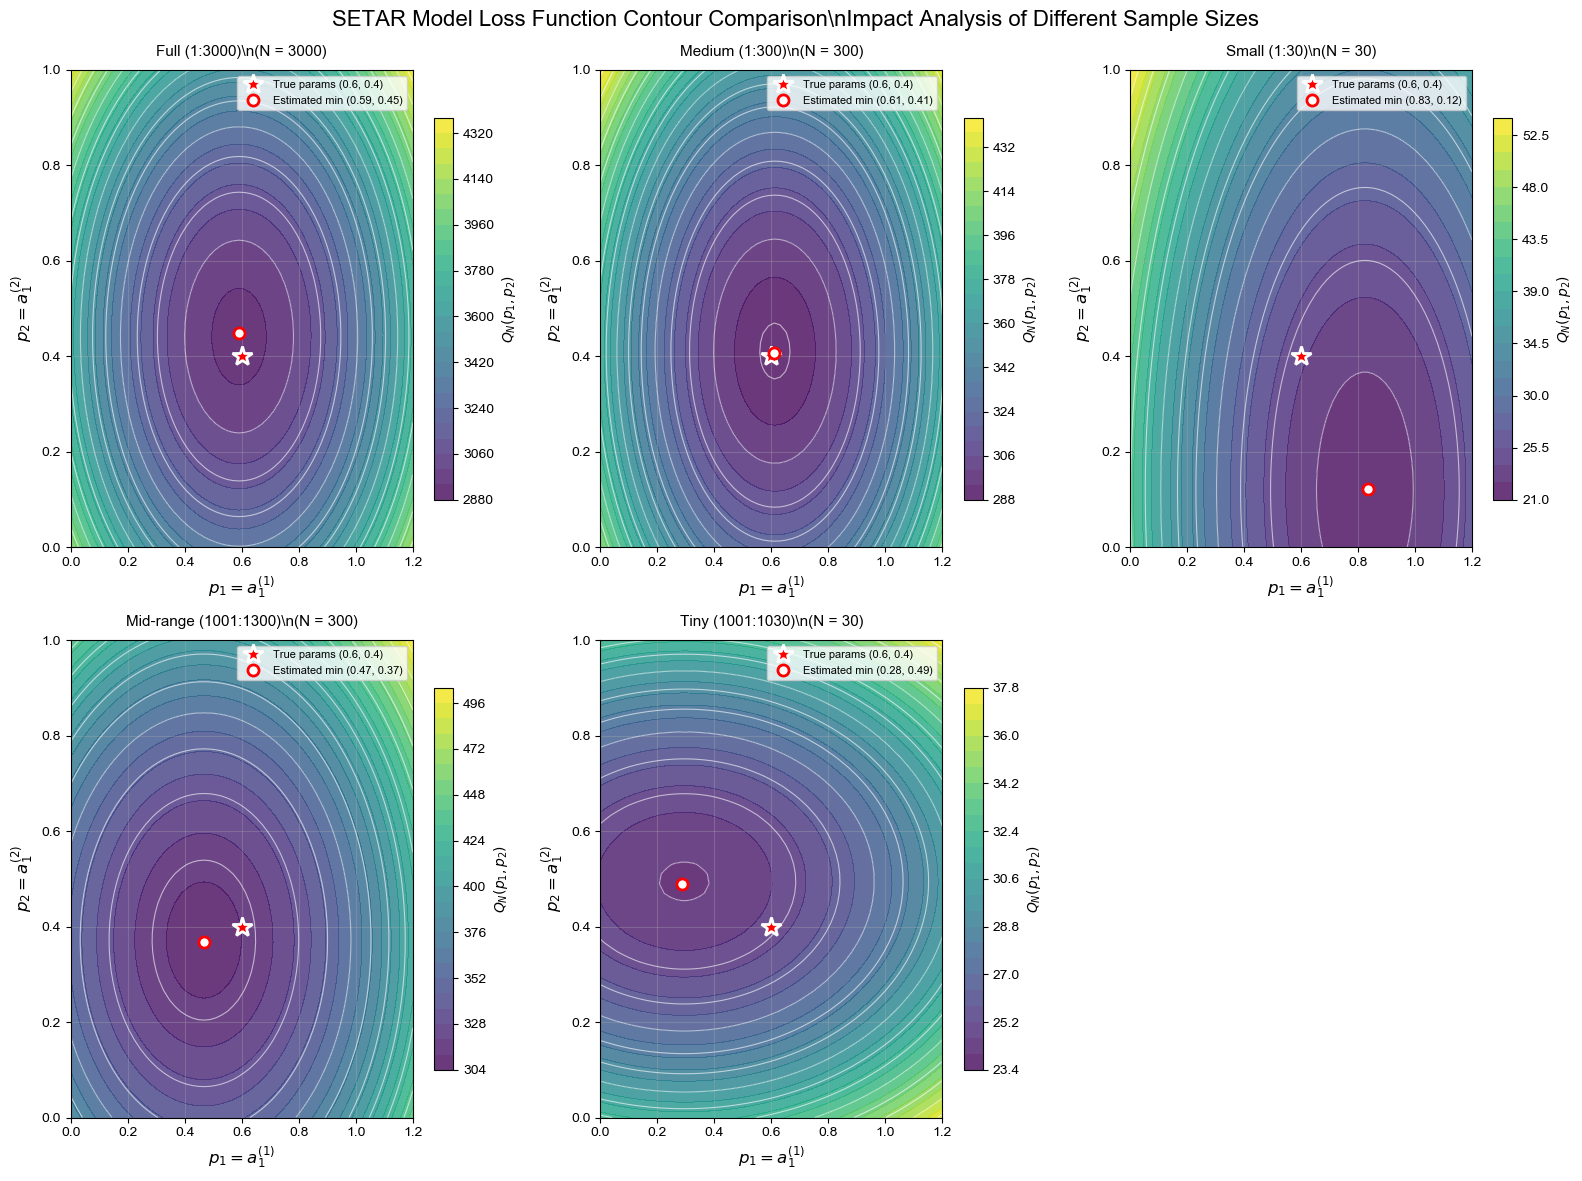

\n✅ All contour plots completed!


In [6]:
# Calculate loss function grids for all sample sizes and plot contour comparison
import time

def plot_contour_comparison():
    """Plot comparison of loss function contours for different sample sizes"""
    
    fig = plt.figure(figsize=(16, 12))
    
    # Calculate and plot contour map for each sample configuration
    for idx, (name, X_subset) in enumerate(sample_configs.items(), 1):
        print(f"Computing loss function grid for {name} sample...")
        start_time = time.time()
        
        # Calculate loss function grid
        Q_grid = compute_loss_grid(X_subset, p1_vals, p2_vals)
        
        elapsed = time.time() - start_time
        print(f"  Computation completed in {elapsed:.2f} seconds")
        
        # Create subplot
        ax = fig.add_subplot(2, 3, idx)
        
        # Plot contour map
        P1, P2 = np.meshgrid(p1_vals, p2_vals)
        contour = ax.contourf(P1, P2, Q_grid.T, levels=25, cmap='viridis', alpha=0.8)
        contour_lines = ax.contour(P1, P2, Q_grid.T, levels=15, colors='white', alpha=0.6, linewidths=0.8)
        
        # Mark true parameter point
        ax.plot(true_params['a1_1'], true_params['a1_2'], 'r*', 
                markersize=15, markeredgewidth=2, markeredgecolor='white',
                label=f'True params ({true_params["a1_1"]}, {true_params["a1_2"]})')
        
        # Find and mark minimum point
        min_idx = np.unravel_index(np.argmin(Q_grid), Q_grid.shape)
        min_p1, min_p2 = p1_vals[min_idx[0]], p2_vals[min_idx[1]]
        ax.plot(min_p1, min_p2, 'wo', markersize=8, markeredgewidth=2, markeredgecolor='red',
                label=f'Estimated min ({min_p1:.2f}, {min_p2:.2f})')
        
        # Set labels and title
        ax.set_xlabel(r'$p_1 = a_1^{(1)}$', fontsize=12)
        ax.set_ylabel(r'$p_2 = a_1^{(2)}$', fontsize=12)
        ax.set_title(f'{name}\\n(N = {len(X_subset)})', fontsize=11, pad=10)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8, loc='upper right')
        
        # Add colorbar
        cbar = plt.colorbar(contour, ax=ax, shrink=0.8)
        cbar.set_label(r'$Q_N(p_1, p_2)$', fontsize=10)
        
        # Set axis ranges
        ax.set_xlim(p1_vals.min(), p1_vals.max())
        ax.set_ylim(p2_vals.min(), p2_vals.max())
    
    # Add overall title
    fig.suptitle('SETAR Model Loss Function Contour Comparison\\nImpact Analysis of Different Sample Sizes', fontsize=16, y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    print("\\n✅ All contour plots completed!")

# Execute plotting
plot_contour_comparison()

## 📊 Results Analysis and Discussion

### 🔍 Key Observations

From the contour plot comparison above, we can observe the following important phenomena:

#### 1. **Impact of Sample Size on Loss Function Smoothness**

- **Large samples (N=3000, N=300)**: Loss function shows smooth elliptical contours with clear global minimum
- **Small samples (N=30)**: Loss function becomes irregular with multiple local minima, more complex contour shapes
- **Very small samples**: Increased randomness, loss function may have "false" minima in multiple regions

#### 2. **Parameter Estimation Consistency**

- **True parameters**: $p_1 = a_1^{(1)} = 0.6$, $p_2 = a_1^{(2)} = 0.4$ (red star)
- **Large sample estimation**: Estimated minimum points (white circles) are very close to true parameters
- **Small sample estimation**: Estimates may deviate from true parameters, showing estimation instability

#### 3. **Loss Function Shape Changes**

Sample Size | Loss Function Features | Estimation Quality
------------|----------------------|-------------------
N = 3000 | Smooth ellipse, single global minimum | Best
N = 300  | Relatively smooth, near elliptical | Good  
N = 30   | Irregular, multiple local minima | Poor
N = 30 (different position) | Shape depends on specific data segment | Unstable

### 🎯 Statistical Interpretation

#### **Large Sample Properties**

1. **Consistency**: As sample size increases, parameter estimates converge to true values
2. **Asymptotic Normality**: In large samples, estimators approximately follow normal distribution
3. **Loss Function Smoothing**: Large samples make loss function smoother, reducing local extrema

#### **Small Sample Issues**

1. **Estimation Instability**: Small samples are easily affected by random errors
2. **Local Extrema**: May get trapped in local minima rather than global minimum  
3. **Parameter Identification Difficulty**: Hard to accurately identify true parameters with limited samples

### 💡 Practical Implications

This analysis demonstrates the performance of **Prediction Error Method** in SETAR model estimation:

- ✅ **Good performance with large samples**: Can accurately identify parameters and provide stable estimates
- ⚠️ **Caution needed with small samples**: Require more complex estimation methods or regularization techniques
- 📈 **Sample size planning**: Need to balance data collection costs with estimation accuracy in practical applications